In [59]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation


import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff


# Step 1: Loading Dataset

In [60]:
df = pd.read_csv('Data/Classification_Soccer.csv')

# Removing leading and trailing spaces from column names
df.columns = df.columns.str.strip()

# Using a regular expression to replace multiple spaces with a single space in all column names
df.columns = df.columns.str.replace(r'\s+', ' ', regex=True)  

# # Dropping columns that are not needed
df.drop([
        "Date",
        "Time",

         ], axis=1, inplace=True)




# Step 2: Overview of Dataset

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2659 entries, 0 to 2658
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Week                        2659 non-null   int64  
 1   Round                       2659 non-null   int64  
 2   MatchMonth                  2659 non-null   int64  
 3   MatchDayOfWeek              2659 non-null   int64  
 4   MatchHour                   2659 non-null   int64  
 5   TimeOfDay                   2659 non-null   object 
 6   HomeTeam                    2659 non-null   object 
 7   AwayTeam                    2659 non-null   object 
 8   StadiumDistance             2659 non-null   float64
 9   HomeTeamStadiumTemperature  2659 non-null   float64
 10  Result                      2659 non-null   object 
dtypes: float64(2), int64(5), object(4)
memory usage: 228.6+ KB


In [62]:
df.head()

,Week,Round,MatchMonth,MatchDayOfWeek,MatchHour,TimeOfDay,HomeTeam,AwayTeam,StadiumDistance,HomeTeamStadiumTemperature,Result
0,1,1,8,5,2,Night,Arsenal,Leicester City,138.088304,15.685000,H
1,1,1,8,5,19,Evening,Watford,Liverpool,263.461104,15.508500,D
2,1,1,8,5,22,Night,Chelsea,Burnley,291.507090,15.971499,A
3,1,1,8,5,22,Night,Crystal Palace,Huddersfield Town,275.762802,15.652500,A
4,1,1,8,5,22,Night,Everton,Stoke City,72.837918,15.637500,H


# Step 3: EDA - Missing Values Analysis 

## Step 3)i): EDA - Show Missing Values in each Column

In [63]:
# Get percentage of null values in each column
null_values_percentage = df.isnull().mean().round(4).mul(100).sort_values(ascending=False)
print('-' * 44)
print("Percentage(%) of null values in each column")
print('-' * 44)
print(null_values_percentage)
print('\n')

# Get total null values in each column
total_null_values = df.isnull().sum().sort_values(ascending=False)
print('-' * 33)
print("Total null values in each column")
print('-' * 33)
print(total_null_values)

--------------------------------------------
Percentage(%) of null values in each column
--------------------------------------------
Week                          0.0
Round                         0.0
MatchMonth                    0.0
MatchDayOfWeek                0.0
MatchHour                     0.0
TimeOfDay                     0.0
HomeTeam                      0.0
AwayTeam                      0.0
StadiumDistance               0.0
HomeTeamStadiumTemperature    0.0
Result                        0.0
dtype: float64


---------------------------------
Total null values in each column
---------------------------------
Week                          0
Round                         0
MatchMonth                    0
MatchDayOfWeek                0
MatchHour                     0
TimeOfDay                     0
HomeTeam                      0
AwayTeam                      0
StadiumDistance               0
HomeTeamStadiumTemperature    0
Result                        0
dtype: int64


## Step 3)ii): EDA - Handling Missing Values

In [64]:
# # Drop rows with missing values
df = df.dropna()

# Step 4: EDA - Duplicate Values Analysis 

## Step 4)i): EDA - Show Duplicate Values Rows

In [65]:
# Get percentage of duplicate rows
total_rows = len(df)
duplicate_rows = df.duplicated().sum()
duplicate_percentage = (duplicate_rows / total_rows) * 100

print('-' * 48)
print("Percentage(%) of duplicate rows in the DataFrame")
print('-' * 48)
print(f"{duplicate_percentage:.2f}%")
print('\n')

# Get total number of duplicate rows
print('-' * 30)
print("Total number of duplicate rows")
print('-' * 30)
print(duplicate_rows)


------------------------------------------------
Percentage(%) of duplicate rows in the DataFrame
------------------------------------------------
0.00%


------------------------------
Total number of duplicate rows
------------------------------
0


# Step 5: EDA - Analyzing Column

## Step 5)i): EDA - Overview Analysis

In [66]:
def Show_Column_Feature_Occurrences(DataFrame, Feature, sort_order=None, orientation='vertical'):
    # Count occurrences of each unique value
    data = DataFrame[Feature].value_counts().reset_index()
    
    # Rename columns for clarity
    data.columns = [Feature, 'Count']
    
    # Sort data based on sort_order parameter
    if sort_order == 'ascending':
        data = data.sort_values('Count', ascending=True)
    elif sort_order == 'descending':
        data = data.sort_values('Count', ascending=False)
    elif sort_order == 'alphabetical':
        data = data.sort_values(Feature, ascending=True)
    else:
        if sort_order is not None:
            print("Invalid sort_order parameter. Please choose from 'ascending', 'descending', 'alphabetical'.")
    
    # Plot
    if orientation == 'vertical':
        fig = px.bar(data, x=Feature, y='Count', color=Feature)
    elif orientation == 'horizontal':
        fig = px.bar(data, x='Count', y=Feature, color=Feature)
    else:
        print("Invalid orientation parameter. Please choose from 'horizontal', 'vertical'.")
    fig.update_layout(title=f'{Feature}: Feature Occurrences')
    
    fig.show()

In [67]:
# Show the distribution of match results
fig = px.pie(df, 
             names='Result', 
             title='Match Results Distribution')
fig.show()

In [68]:
Show_Column_Feature_Occurrences(df, 
                                Feature='Result', 
                                sort_order='descending', 
                                orientation='horizontal')

In [69]:
Show_Column_Feature_Occurrences(df, 
                                Feature='HomeTeam', 
                                sort_order='descending', 
                                orientation='horizontal')

In [70]:
Show_Column_Feature_Occurrences(df, 
                                Feature='AwayTeam', 
                                sort_order='descending', 
                                orientation='horizontal')

## Step 5)ii): EDA - Univariate Analysis

In [71]:
def univariate_analysis_plotly(df):
    """

    Perform univariate analysis on a DataFrame using Plotly.

    Parameters:
    - df: DataFrame to be analyzed.

    Returns:
    - Interactive Plotly plots with summary statistics in the legend.
    """
    colors = px.colors.qualitative.Plotly

    for idx, column in enumerate(df.columns):

        # Generate descriptive statistics
        stats = df[column].describe()
        stats_str = '<br>'.join([f'{k}: {v:.2f}' if isinstance(v, (float, int)) else f'{k}: {v}' for k, v in stats.items()])

        # Visualization based on datatype
        if np.issubdtype(df[column].dtype, np.number):

            # If the column is numeric, plot a histogram with a box plot as marginal
            fig = px.histogram(df, x=column, marginal="box", title=f"Histogram for {column}", color_discrete_sequence=[colors[idx % len(colors)]])
        else:

            # If the column is categorical or textual, plot a bar chart
            value_counts = df[column].value_counts()

            fig = px.bar(x=value_counts.index, y=value_counts.values, 
                         title=f"Bar Chart for {column}", 
                         labels={"x": column, "y": "Count"},
                         color_discrete_sequence=[colors[idx % len(colors)]])

        # Add descriptive stats as a legend using a dummy trace for both types of columns
        fig.add_trace(go.Scatter(x=[None], y=[None], mode="lines", 
                                 name=stats_str, showlegend=True, 
                                 hoverinfo="none", opacity=0))
        
        fig.show()

univariate_analysis_plotly(df)

## Step 5)iii): EDA - Bivariate Analysis

In [72]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

def bivariate_analysis_plotly(df, target_column):
    """
    Perform bivariate analysis on a DataFrame using Plotly.

    Parameters:
    - df: DataFrame to be analyzed.
    - target_column: The target column to compare other columns against.

    Returns:
    - Interactive Plotly plots for bivariate analysis.
    """
    colors = px.colors.qualitative.Plotly

    for idx, column in enumerate(df.columns):
        if column == target_column:
            continue  # Skip the target column in the independent variables

        # Check if the column is numeric or categorical
        if np.issubdtype(df[column].dtype, np.number):
            # For numeric features, use box plot to show distribution against target
            fig = px.box(df, x=target_column, y=column, 
                         title=f"Box Plot of {column} vs {target_column}",
                         color=target_column, 
                         color_discrete_sequence=colors)
        else:
            # For categorical features, use bar chart to show distribution of categories
            fig = px.bar(df.groupby([column, target_column]).size().reset_index(name='Count'),
                         x=column, y='Count', color=target_column,
                         title=f"Bar Chart of {column} vs {target_column}",
                         barmode='group', color_discrete_sequence=colors)

        # Add summary statistics in the legend
        fig.show()

# Example usage with the provided DataFrame
bivariate_analysis_plotly(df, "Result")


# Step 6): EDA - Outliers Detection and Removal

## Step 6)i): EDA - Outliers Detection

In [73]:
def create_box_plots(df, columns):
    """
    Create box plots for the specified columns of a pandas DataFrame.
    Args:
    df (pd.DataFrame): The DataFrame containing the data.
    columns (list of str): The list of columns for which to create box plots.
    Returns:
    plotly.graph_objs._figure.Figure: The figure object containing the box plots.
    """
    fig = px.box(df, x=columns)
    fig.update_layout(
        title="Box Plot",
        xaxis_title="Columns",
        yaxis_title="Values",
        showlegend=False
    )
    return fig


columns = df.select_dtypes(include=['number']).columns.tolist()


fig = create_box_plots(df, columns=columns)
fig.show()


## Step 6)ii): EDA - Outliers Removal

In [74]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import pandas as pd

def plot_outliers_before_after_removal(feature_name, before_removal_data, after_removal_data):
    """
    Plot the box plots before and after removing outliers.
    Args:
        feature_name (str): The name of the feature to plot.
        before_removal_data (pd.Series): Data before removing outliers.
        after_removal_data (pd.Series): Data after removing outliers.
    """
    
    # Create a subplot figure with 2 rows and 1 column
    fig = make_subplots(rows=2, cols=1, subplot_titles=("Before Filtering", "After Filtering"))

    # Add the first plot to the first row
    fig.add_trace(
        go.Box(x=before_removal_data, name="Before Filtering", orientation='h'),
        row=1, col=1
    )

    # Add the second plot to the second row
    fig.add_trace(
        go.Box(x=after_removal_data, name="After Filtering", orientation='h'),
        row=2, col=1
    )

    # Update layout
    fig.update_layout(height=600, title_text=f"Comparison of <b>{feature_name}</b> Before and After Filtering Outliers")

    # Show the figure
    fig.show()

# Step 7): EDA - Feature Selection

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2659 entries, 0 to 2658
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Week                        2659 non-null   int64  
 1   Round                       2659 non-null   int64  
 2   MatchMonth                  2659 non-null   int64  
 3   MatchDayOfWeek              2659 non-null   int64  
 4   MatchHour                   2659 non-null   int64  
 5   TimeOfDay                   2659 non-null   object 
 6   HomeTeam                    2659 non-null   object 
 7   AwayTeam                    2659 non-null   object 
 8   StadiumDistance             2659 non-null   float64
 9   HomeTeamStadiumTemperature  2659 non-null   float64
 10  Result                      2659 non-null   object 
dtypes: float64(2), int64(5), object(4)
memory usage: 228.6+ KB


In [76]:
df.head()

,Week,Round,MatchMonth,MatchDayOfWeek,MatchHour,TimeOfDay,HomeTeam,AwayTeam,StadiumDistance,HomeTeamStadiumTemperature,Result
0,1,1,8,5,2,Night,Arsenal,Leicester City,138.088304,15.685000,H
1,1,1,8,5,19,Evening,Watford,Liverpool,263.461104,15.508500,D
2,1,1,8,5,22,Night,Chelsea,Burnley,291.507090,15.971499,A
3,1,1,8,5,22,Night,Crystal Palace,Huddersfield Town,275.762802,15.652500,A
4,1,1,8,5,22,Night,Everton,Stoke City,72.837918,15.637500,H


In [77]:
from sklearn.preprocessing import LabelEncoder

def apply_label_encoding(df: pd.DataFrame, columns_to_encode: list[str]) -> pd.DataFrame:
    """
    Apply automatic Label Encoding to specific columns of a DataFrame.

    Parameters:
    - df: Input DataFrame
    - columns_to_encode: List of column names to apply Label Encoding

    Returns:
    - DataFrame with Label Encoded columns
    """
    
    df_encoded = df.copy()
    label_encoders = {}

    for column in columns_to_encode:
        # Initialize LabelEncoder for each column
        le = LabelEncoder()

        # Fit and transform the column
        df_encoded[column] = le.fit_transform(df[column])

        # Save the encoder for later use if needed (e.g., reverse mapping)
        label_encoders[column] = le

        # Print the label encoding mapping for the column
        print(f"Label Encoding for '{column}': {dict(zip(le.classes_, le.transform(le.classes_)))}")
    
    return df_encoded


FS_df_encoded = apply_label_encoding(df, 
                                     ['HomeTeam', 
                                      'AwayTeam',
                                      'TimeOfDay',
                                      "Result",                            
                                     ])

FS_df_encoded.head()


Label Encoding for 'HomeTeam': {'AFC Bournemouth': 0, 'Arsenal': 1, 'Aston Villa': 2, 'Brentford': 3, 'Brighton Hove Albion': 4, 'Burnley': 5, 'Cardiff City': 6, 'Chelsea': 7, 'Crystal Palace': 8, 'Everton': 9, 'Fulham': 10, 'Huddersfield Town': 11, 'Leeds United': 12, 'Leicester City': 13, 'Liverpool': 14, 'Luton Town': 15, 'Manchester City': 16, 'Manchester United': 17, 'Newcastle United': 18, 'Norwich City': 19, 'Nottingham Forest': 20, 'Sheffield United': 21, 'Southampton': 22, 'Stoke City': 23, 'Swansea City': 24, 'Tottenham Hotspur': 25, 'Watford': 26, 'West Bromwich': 27, 'West Ham United': 28, 'Wolves': 29}
Label Encoding for 'AwayTeam': {'AFC Bournemouth': 0, 'Arsenal': 1, 'Aston Villa': 2, 'Brentford': 3, 'Brighton Hove Albion': 4, 'Burnley': 5, 'Cardiff City': 6, 'Chelsea': 7, 'Crystal Palace': 8, 'Everton': 9, 'Fulham': 10, 'Huddersfield Town': 11, 'Leeds United': 12, 'Leicester City': 13, 'Liverpool': 14, 'Luton Town': 15, 'Manchester City': 16, 'Manchester United': 17, 'N

,Week,Round,MatchMonth,MatchDayOfWeek,MatchHour,TimeOfDay,HomeTeam,AwayTeam,StadiumDistance,HomeTeamStadiumTemperature,Result
0,1,1,8,5,2,1,1,13,138.088304,15.685000,2
1,1,1,8,5,19,0,26,14,263.461104,15.508500,1
2,1,1,8,5,22,1,7,5,291.507090,15.971499,0
3,1,1,8,5,22,1,8,11,275.762802,15.652500,0
4,1,1,8,5,22,1,9,23,72.837918,15.637500,2


## Step 7)i): EDA - Categorical Feature Selection

In [78]:
from sklearn.feature_selection import SelectKBest, f_classif

def anova_fvalue_test_visualization(X, y, num_features='all', chart_orientation="horizontal"):
    """
    Performs ANOVA F-value test on the dataset and returns the top k features with the highest F-value score.
    
    Args:
        X (pd.DataFrame): Independent variables.
        y (pd.Series or pd.DataFrame): Dependent variable.
        num_features (int or str, optional): Number of top features to select. Use 'all' to return all features. Defaults to 'all'.
        chart_orientation (str, optional): Orientation of the bar chart. Defaults to "horizontal". Options: ['horizontal', 'vertical']

    Returns:
        pd.DataFrame: Dataframe with the top k features with the highest F-value score.
    """
    
    # Determine the number of features to use
    if num_features == 'all':
        num_features = X.shape[1]
    elif isinstance(num_features, int):
        num_features = min(num_features, X.shape[1])
    else:
        raise ValueError("Invalid value for num_features. It should be an integer or 'all'.")
    
    # Apply SelectKBest class to extract top k best features
    bestfeatures = SelectKBest(score_func=f_classif, k=num_features)
    fit = bestfeatures.fit(X, y)
    
    # Concatenate feature names and scores for visualization 
    featureScores = pd.concat([pd.Series(X.columns, name='Feature'), 
                               pd.Series(fit.scores_, name='Score')], axis=1)
    
    if chart_orientation.lower() == "horizontal":
        fig = px.bar(featureScores.nlargest(num_features, 'Score'), 
                     x='Score', y='Feature',
                     title='ANOVA F-value Scores',
                     labels={'Score':'F-value Score', 'Feature': 'Feature'})

    elif chart_orientation.lower() == "vertical":
        fig = px.bar(featureScores.nlargest(num_features, 'Score'), 
                     x='Feature', y='Score',
                     title='ANOVA F-value Scores',
                     labels={'Score':'F-value Score', 'Feature': 'Feature'})
    else:
        print("Invalid chart orientation. Please choose 'horizontal' or 'vertical'")
        return
    
    fig.show()
    
    return featureScores.nlargest(num_features, 'Score')


X = FS_df_encoded.drop('Result', axis=1)  
y = FS_df_encoded['Result']  

anova_fvalue_test_visualization(X, y, 
                                num_features='all', 
                                chart_orientation="horizontal")

,Feature,Score
3,MatchDayOfWeek,2.481906
1,Round,1.542571
6,HomeTeam,1.439729
0,Week,1.277897
9,HomeTeamStadiumTemperature,0.889960
7,AwayTeam,0.834502
4,MatchHour,0.675403
5,TimeOfDay,0.556272
8,StadiumDistance,0.359173
2,MatchMonth,0.017271


## Step 7)ii): EDA - Numerical Feature Selection

In [79]:
import pandas as pd
import plotly.figure_factory as ff


def heatmap_correlations(df: pd.DataFrame, targetVariable:str ,colorscale:str="Viridis"):
    """
    Create a heatmap showing the correlation of all pairs of variables in the dataframe.
    Parameters:
    - df (pd.DataFrame): Data to be plotted.
    - targetVariable (str): The dependent variable for which correlations will be displayed.
    - colorscale (str): Desired colorscale for the heatmap. Default is "Viridis".
    Returns:
    - None: Shows the heatmap.
    """
    
    # Filtering only numerical columns
    df_numeric = df.select_dtypes(include=['number'])
    
    # Check if targetVariable is numeric
    if targetVariable not in df_numeric.columns:
        print(f"The target variable {targetVariable} is not numeric.")
        return
    
    # Print the correlation of the target variable with other variables
    print('-' * 56)
    print(f"Correlation of {targetVariable} with other Independent variables")
    print('-' * 56)
    print(df_numeric.corr()[targetVariable].sort_values(ascending=False))
    
    # Calculate the correlation matrix
    corr_matrix = df_numeric.corr()
    # Create a heatmap using the correlation matrix
    fig = ff.create_annotated_heatmap(
        z=corr_matrix.values, 
        x=list(corr_matrix.columns), 
        y=list(corr_matrix.index),
        annotation_text=corr_matrix.round(2).values,
        colorscale=colorscale
    )

    fig.update_layout(title="Correlation Heatmap of Variables")
    
    fig.show()


heatmap_correlations(FS_df_encoded, 
                     targetVariable='Result', 
                     colorscale='RdYlGn')


--------------------------------------------------------
Correlation of Result with other Independent variables
--------------------------------------------------------
Result                        1.000000
AwayTeam                      0.023385
MatchHour                     0.021710
TimeOfDay                     0.020439
Week                          0.019195
StadiumDistance               0.016046
Round                         0.015174
MatchMonth                   -0.003605
HomeTeam                     -0.018927
HomeTeamStadiumTemperature   -0.025447
MatchDayOfWeek               -0.033919
Name: Result, dtype: float64


In [80]:
"""
--------------------------------------------------------
Correlation of Result with other Independent variables
--------------------------------------------------------
Result                        1.000000
AwayTeam                      0.023385
MatchHour                     0.021710
TimeOfDay                     0.020439
Week                          0.019195
StadiumDistance               0.016046
Round                         0.015174
MatchMonth                   -0.003605
HomeTeam                     -0.018927
HomeTeamStadiumTemperature   -0.025447
MatchDayOfWeek               -0.033919
"""


# Drop All Columns with Less Correlation
df.drop([
        "MatchMonth",
        "Round",
        "StadiumDistance",
        "Week",
        
         ], axis=1, inplace=True)

# Step 8): EDA - Feature Scaling 

## Step 8)i): EDA - Categorical Feature Scaling

In [81]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import joblib

def apply_auto_label_encoding(df: pd.DataFrame, columns_to_encode: list[str], save_path: str) -> pd.DataFrame:
    """
    Apply automatic Label Encoding to specific columns of a DataFrame and save the encoding mapping.

    Parameters:
    - df: Input DataFrame
    - columns_to_encode: List of column names to apply Label Encoding
    - save_path: Path to save the encoding mapping (label encoders)

    Returns:
    - DataFrame with Label Encoded columns
    """
    
    df_encoded = df.copy()  # Create a copy of the DataFrame
    label_encoders = {}     # Dictionary to store LabelEncoders for each column
    
    for column in columns_to_encode:
        # Initialize a LabelEncoder
        le = LabelEncoder()
        
        # Fit the LabelEncoder and transform the column
        df_encoded[column] = le.fit_transform(df[column])
        
        # Print the label encoding mapping for the column
        print(f"Label Encoding for '{column}': {dict(zip(le.classes_, le.transform(le.classes_)))}")
        
        # Store the LabelEncoder for later use
        label_encoders[column] = le
    
    # Save the LabelEncoders using joblib
    joblib.dump(label_encoders, save_path)
    
    return df_encoded 


df_encoded = apply_auto_label_encoding(df, 
                                       ['HomeTeam', 'AwayTeam', "MatchDayOfWeek", "TimeOfDay", "Result"], 
                                       'Mappings/label_encoders.joblib')



df = df_encoded
df.head()


Label Encoding for 'HomeTeam': {'AFC Bournemouth': 0, 'Arsenal': 1, 'Aston Villa': 2, 'Brentford': 3, 'Brighton Hove Albion': 4, 'Burnley': 5, 'Cardiff City': 6, 'Chelsea': 7, 'Crystal Palace': 8, 'Everton': 9, 'Fulham': 10, 'Huddersfield Town': 11, 'Leeds United': 12, 'Leicester City': 13, 'Liverpool': 14, 'Luton Town': 15, 'Manchester City': 16, 'Manchester United': 17, 'Newcastle United': 18, 'Norwich City': 19, 'Nottingham Forest': 20, 'Sheffield United': 21, 'Southampton': 22, 'Stoke City': 23, 'Swansea City': 24, 'Tottenham Hotspur': 25, 'Watford': 26, 'West Bromwich': 27, 'West Ham United': 28, 'Wolves': 29}
Label Encoding for 'AwayTeam': {'AFC Bournemouth': 0, 'Arsenal': 1, 'Aston Villa': 2, 'Brentford': 3, 'Brighton Hove Albion': 4, 'Burnley': 5, 'Cardiff City': 6, 'Chelsea': 7, 'Crystal Palace': 8, 'Everton': 9, 'Fulham': 10, 'Huddersfield Town': 11, 'Leeds United': 12, 'Leicester City': 13, 'Liverpool': 14, 'Luton Town': 15, 'Manchester City': 16, 'Manchester United': 17, 'N

,MatchDayOfWeek,MatchHour,TimeOfDay,HomeTeam,AwayTeam,HomeTeamStadiumTemperature,Result
0,5,2,1,1,13,15.685000,2
1,5,19,0,26,14,15.508500,1
2,5,22,1,7,5,15.971499,0
3,5,22,1,8,11,15.652500,0
4,5,22,1,9,23,15.637500,2


## Step 8)ii): EDA - Numerical Feature Scaling

In [82]:

from sklearn.preprocessing import MinMaxScaler

def min_max_scale_dataframe(dataframe, columns_to_scale):
    """
    Scales the specified columns of the DataFrame using Min-Max Scaling.
    :param dataframe: pandas DataFrame
    :param columns_to_scale: list of strings, names of columns to scale
    :return: DataFrame with scaled columns
    """
    # Create a copy of the DataFrame to avoid modifying the original one
    df_scaled = dataframe.copy()
    
    # Initialize the Min-Max Scaler
    scaler = MinMaxScaler()
    
    # Perform Min-Max Scaling on specified columns and update the DataFrame
    df_scaled[columns_to_scale] = scaler.fit_transform(dataframe[columns_to_scale])
    
    return df_scaled


# numerical_features = ["Week",
#                       "Round",
#                       "MatchMonth",
#                       "MatchDayOfWeek",
#                       "MatchHour",
#                       "StadiumDistance",
#                       "HomeTeamStadiumTemperature"
#                       ]
 
numerical_features = ["MatchHour",
                      "HomeTeamStadiumTemperature",
                      ]

scaled_df = min_max_scale_dataframe(dataframe=df, 
                                    columns_to_scale=numerical_features)

df = scaled_df
df.head()

,MatchDayOfWeek,MatchHour,TimeOfDay,HomeTeam,AwayTeam,HomeTeamStadiumTemperature,Result
0,5,0.086957,1,1,13,0.776966,2
1,5,0.826087,0,26,14,0.770287,1
2,5,0.956522,1,7,5,0.787808,0
3,5,0.956522,1,8,11,0.775737,0
4,5,0.956522,1,9,23,0.775169,2


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2659 entries, 0 to 2658
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   MatchDayOfWeek              2659 non-null   int64  
 1   MatchHour                   2659 non-null   float64
 2   TimeOfDay                   2659 non-null   int32  
 3   HomeTeam                    2659 non-null   int32  
 4   AwayTeam                    2659 non-null   int32  
 5   HomeTeamStadiumTemperature  2659 non-null   float64
 6   Result                      2659 non-null   int32  
dtypes: float64(2), int32(4), int64(1)
memory usage: 104.0 KB


# Step 9) Train Test Split

In [84]:
from sklearn.model_selection import train_test_split

X = df.drop("Result", axis=1)
y = df["Result"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=42)

# Step 10) XGBoost Model

In [85]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def Confusion_Matrix_For_Multi_Class_With_Overview(title, y_test, y_pred):
    """
    Create a confusion matrix for multi-class classification with detailed overview.

    Parameters:
    - title: Title for the confusion matrix plot.
    - y_test: True labels of the test data.
    - y_pred: Predicted labels of the test data.

    Returns:
    - A seaborn heatmap representing the confusion matrix.
    """

    # Creating the confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    # Determine class labels
    class_labels = np.unique(np.concatenate((y_test, y_pred)))

    # Calculate the counts and percentages for the confusion matrix
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    
    # Calculate TP and FP percentages
    TP_percentages = ["{0:.2%}".format(value/np.sum(cf_matrix, axis=1)[i]) for i, value in enumerate(np.diag(cf_matrix))]
    FP_percentages = ["{0:.2%}".format((np.sum(cf_matrix, axis=0)[i] - value)/np.sum(cf_matrix)) for i, value in enumerate(np.diag(cf_matrix))]
    
    # Combine TP and FP with their percentages
    combined_info = []
    for i in range(cf_matrix.shape[0]):
        for j in range(cf_matrix.shape[1]):
            value = cf_matrix[i, j]
            if i == j:  # True Positive
                combined_info.append(f"{value}\n(TP: {TP_percentages[i]})")
            else:  # False Positive
                combined_info.append(f"{value}\n(FP: {FP_percentages[j]})")

    labels = np.asarray(combined_info).reshape(cf_matrix.shape)

    # Plotting the heatmap
    plt.figure(figsize=(5, 5))
    ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    ax.set_title(f'{title}\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values')

    # Show the plot
    plt.show()



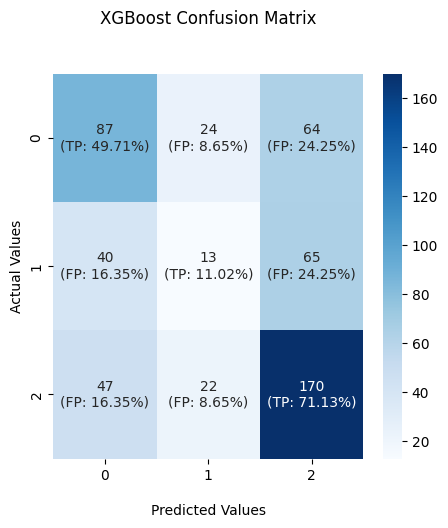

              precision    recall  f1-score   support

           0       0.50      0.50      0.50       175
           1       0.22      0.11      0.15       118
           2       0.57      0.71      0.63       239

    accuracy                           0.51       532
   macro avg       0.43      0.44      0.43       532
weighted avg       0.47      0.51      0.48       532



In [86]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

def XGBoost_Train_Evaluate(X_train, X_test, y_train, y_test, 
                           objective='multi:softmax', num_class=None, 
                           n_estimators=100, learning_rate=0.1, max_depth=6, 
                           subsample=1.0, colsample_bytree=1.0, gamma=0, 
                           reg_alpha=0, reg_lambda=1, verbosity=1, random_state=42, verbose=False):
   
    model = xgb.XGBClassifier(
        objective=objective,
        num_class=num_class,
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        gamma=gamma,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        verbosity=verbosity,
        random_state=random_state,
        use_label_encoder=False  # Avoids warning in newer versions of XGBoost
    )

    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=verbose)
    y_pred = model.predict(X_test).flatten()  # Ensure y_pred is a 1D array
    
    df = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': y_pred.tolist()})
    
    Confusion_Matrix_For_Multi_Class_With_Overview("XGBoost Confusion Matrix", y_test, y_pred)
    print(classification_report(y_test, y_pred))
    
    return df



"""
Best Parameters: {
    'n_estimators': 366, 
    'learning_rate': 0.4594259565422311,
    'max_depth': 3, 
    'subsample': 0.5163571458564111, 
    'colsample_bytree': 0.5547050899403205, 
    'gamma': 1.0546559043221597, 
    'reg_alpha': 0.29203039952794485, 
    'reg_lambda': 2.1708419038837645
    }
    
Best Score: 0.4429142292773435

"""


# Best Parameters example
XGBoost_df = XGBoost_Train_Evaluate(X_train, X_test, y_train, y_test, 
                                    objective='multi:softmax', 
                                    num_class=3, 
                                    n_estimators=366, 
                                    learning_rate=0.4594, 
                                    max_depth=3, 
                                    subsample=0.5163, 
                                    colsample_bytree=0.5547, 
                                    gamma=1.0546, 
                                    reg_alpha=0.2920, 
                                    reg_lambda=2.1708, 
                                    verbosity=1, 
                                    random_state=42, 
                                    verbose=False)


# Step 11) XGBoost Hyperparameter Tuning

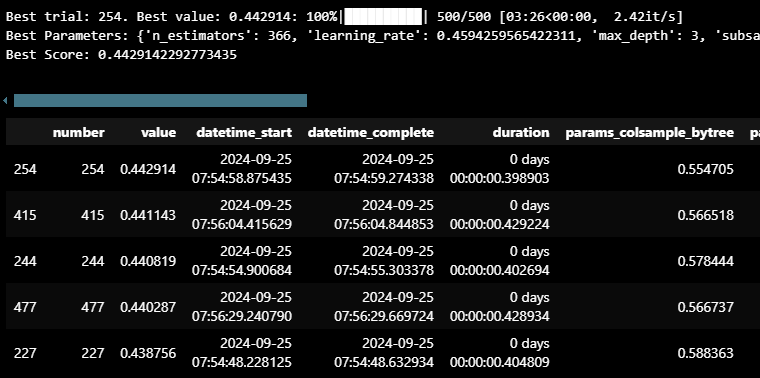

In [87]:
# import optuna
# from sklearn.model_selection import cross_val_score
# import pandas as pd


# # Suppress Optuna output
# optuna.logging.set_verbosity(optuna.logging.CRITICAL)

# # Objective function for Optuna
# def objective(trial):
#     params = {
#         'objective': 'multi:softmax',
#         'num_class': 3,  # Update based on your specific number of classes
#         'n_estimators': trial.suggest_int('n_estimators', 50, 500),
#         'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
#         'max_depth': trial.suggest_int('max_depth', 3, 10),
#         'subsample': trial.suggest_float('subsample', 0.5, 1.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
#         'gamma': trial.suggest_float('gamma', 0, 10),
#         'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
#         'reg_lambda': trial.suggest_float('reg_lambda', 0, 10),
#         'random_state': 42,
#         'use_label_encoder': False
#     }
#     model = xgb.XGBClassifier(**params)
#     score = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_macro', n_jobs=-1, verbose=0)
#     return score.mean()



# # Create a study and optimize the objective function
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=500, timeout=None, show_progress_bar=True)

# # Print the best parameters and the best score
# print("Best Parameters:", study.best_params)
# print("Best Score:", study.best_value)

# # Get the detailed study results
# df = study.trials_dataframe()
# df_sorted = df.sort_values('value', ascending=False)
# df_sorted.head()